In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width=180
img_height=180

In [4]:
 data_train = tf.keras.utils.image_dataset_from_directory(
     data_train_path,
     shuffle=True,
     image_size=(img_width,img_height),
     batch_size=32,
     validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
 data_val = tf.keras.utils.image_dataset_from_directory(
     data_val_path,
     shuffle=True,
     image_size=(img_width,img_height),
     batch_size=32,
     validation_split=False)

Found 351 files belonging to 36 classes.


In [7]:
 data_test = tf.keras.utils.image_dataset_from_directory(
     data_test_path,
     shuffle=True,
     image_size=(img_width,img_height),
     batch_size=32,
     validation_split=False)

Found 359 files belonging to 36 classes.


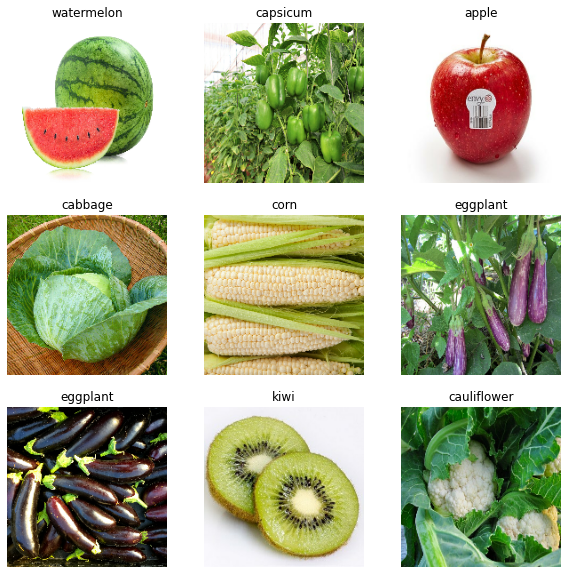

In [8]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [12]:
model

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001E028FF7F10>>

In [15]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
40/98 [===========>..................] - ETA: 44s - loss: 4.0320 - accuracy: 0.0453


KeyboardInterrupt



In [ ]:
data_train

In [16]:
data_val

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

NameError: name 'history' is not defined

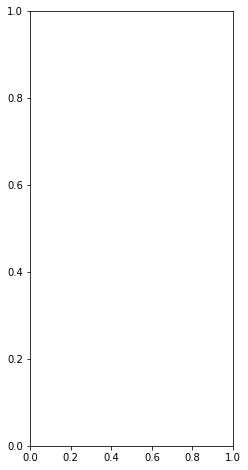

In [17]:
epochs_range= range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [18]:
image= 'grapes.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = np.expand_dims(img_arr,axis=0)

In [19]:
predict=model.predict(img_bat)

1/1 [==============================] - 0s 127ms/step


In [20]:
score = tf.nn.softmax(predict)

In [21]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is grapes with accuracy of 5.68
